In [1]:
import pandas as pd
import networkx as nx
from cdlib import algorithms, evaluation, readwrite
from utils import *
from tqdm import tqdm

In [28]:
# 加载网络
network_id = 2155442387
df = pd.read_csv(f'./cdlib_data/networks/{network_id}.csv', header=None)
df.columns = ['src', 'dst']
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(6, 2)
(6, 2)


In [29]:
# 做映射
nodes = set(df['src'].tolist()) | set(df['dst'].tolist())
nodes_id_map = {v:index for index, v in enumerate(nodes)}

In [30]:
df['src_idx'] = df['src'].map(nodes_id_map)
df['dst_idx'] = df['dst'].map(nodes_id_map)

In [31]:
# 生成图
G = nx.Graph()
G.add_nodes_from(df['src_idx'].tolist())
G.add_nodes_from(df['dst_idx'].tolist())
G.add_edges_from(df[['src_idx', 'dst_idx']].values.tolist())

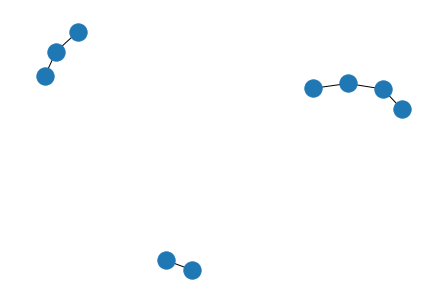

In [32]:
nx.draw(G)

In [6]:
overlapping_algorithms = [
    'aslpaw', 'angel', 'big_clam', 'coach',
     'core_expansion', 'danmf', 'dcs',
    'demon', 'dpclus', 'ebgc', 'ego_networks', 
    'egonet_splitter', 'graph_entropy', 'ipca', 'lais2', 
    'lpanni', 'lfm', 
    'multicom',  'mnmf', 'nnsed', 'node_perception',
    'overlapping_seed_set_expansion', 'umstmo', 'percomvc', 'slpa', 
    'symmnmf', 'wCommunity'
]
# has problem => 'conga', 'congo', 'lemon', 'lpam', 'walkscan'

In [7]:
true_com_obj = readwrite.read_community_csv(f'./cdlib_data/communities/{network_id}.csv', ',', int)
true_com_obj.graph = G
true_com = true_com_obj.communities
true_com_idx = []
for item in true_com:
    item = [nodes_id_map[i] for i in item]
    true_com_idx.append(item)
true_com_obj.communities = true_com_idx

In [24]:
params = {
    'angel': dict(threshold=0.1),
    'conga': dict(number_communities=len(true_com_obj.communities)),
    'congo': dict(number_communities=len(true_com_obj.communities)),
    'demon': dict(epsilon=0.1),
    'lemon': dict(seeds=[1]),
    'lfm': dict(alpha=0.8),
    'multicom': dict(seed_node=0),
    'node_perception': dict(threshold=0.1, overlap_threshold=0.1),
    'overlapping_seed_set_expansion': dict(seeds=list(nodes_id_map.values())),
    # 'walkscan': dict(min_samples=0.1)
}

In [25]:
method = 'walkscan'
kwargs = {}
if method in params:
    kwargs = params[method]
G_ = G.copy()
pred_com_obj = methodFactory(method, G_, kwargs)
pred_com_obj.communities

[[5,
  8,
  15,
  18,
  21,
  24,
  25,
  30,
  31,
  34,
  36,
  44,
  50,
  53,
  56,
  57,
  59,
  60,
  63,
  65,
  69,
  73,
  74,
  77,
  79,
  85,
  91,
  92,
  95,
  99,
  103,
  106,
  108],
 [17, 101, 20, 29]]

In [26]:
new_elist = ['nf1', 'f1', 'overlapping_normalized_mutual_information_LFK','overlapping_normalized_mutual_information_MGH']
metric_data = []
for method in tqdm(overlapping_algorithms):
    print(method)
    kwargs = {}
    if method in params:
        kwargs = params[method]
    G_ = G.copy()
    pred_com_obj = methodFactory(method, G_, kwargs)
    eva_results = []
    for eval_m in new_elist:
        eva_result = eval(f'evaluation.{eval_m}(pred_com_obj, true_com_obj)')
        eva_score = round(eva_result.score, 4)
        eva_score = str(eva_score)
        eva_results.append(eva_score)
    metric_data.append(eva_results)
    
    

  0%|                                                                                                                    | 0/28 [00:00<?, ?it/s]

aslpaw


  4%|███▊                                                                                                        | 1/28 [00:20<09:20, 20.75s/it]

angel
big_clam


 18%|███████████████████▎                                                                                        | 5/28 [00:21<01:02,  2.71s/it]

coach
core_expansion
danmf
dcs


 32%|██████████████████████████████████▋                                                                         | 9/28 [00:21<00:19,  1.02s/it]

demon
dpclus
ebgc
ego_networks


 46%|█████████████████████████████████████████████████▋                                                         | 13/28 [00:22<00:08,  1.80it/s]

egonet_splitter
graph_entropy
ipca
lais2


 54%|█████████████████████████████████████████████████████████▎                                                 | 15/28 [00:23<00:07,  1.77it/s]

lpanni
lfm
multicom


 64%|████████████████████████████████████████████████████████████████████▊                                      | 18/28 [00:25<00:06,  1.67it/s]

mnmf


 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 21/28 [00:26<00:02,  2.41it/s]

nnsed
node_perception
overlapping_seed_set_expansion


 89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 25/28 [00:27<00:00,  3.55it/s]

umstmo
percomvc
slpa


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 26/28 [00:27<00:00,  4.09it/s]

symmnmf
walkscan
wCommunity


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:27<00:00,  1.02it/s]


In [27]:
metric_data

[['0.0889', '0.2348', '0.0904', '0.053'],
 ['0.043', '0.2175', '0.0', '0.0'],
 ['0.0866', '0.2557', '0.0264', '0.0173'],
 ['0.0994', '0.1858', '0.0971', '0.081'],
 ['0.0904', '0.1958', '0.1308', '0.1171'],
 ['0.0623', '0.3738', '0.0226', '0.0143'],
 ['0.1706', '0.2338', '0.0453', '0.04'],
 ['0.0238', '0.286', '0.0929', '0.0248'],
 ['0.1315', '0.22', '0.0815', '0.0494'],
 ['0.0641', '0.2114', '0.0935', '0.0413'],
 ['0.0244', '0.1526', '0.1981', '0.0965'],
 ['0.1085', '0.2905', '0.0508', '0.041'],
 ['0.0532', '0.2071', '0.1065', '0.0508'],
 ['0.0653', '0.2075', '0.0595', '0.0521'],
 ['0.0455', '0.1817', '0.0984', '0.102'],
 ['0.2018', '0.2979', '0.0652', '0.049'],
 ['0.0229', '0.2478', '0.0842', '0.0795'],
 ['0.0809', '0.2675', '0.0865', '0.0761'],
 ['0.0682', '0.376', '0.0254', '0.0211'],
 ['0.0409', '0.2417', '0.0', '0.0'],
 ['0.0714', '0.2229', '0.205', '0.1622'],
 ['0.0529', '0.1773', '0.0585', '0.0283'],
 ['0.0566', '0.2137', '0.0894', '0.0413'],
 ['0.03', '0.405', '0.0886', '0.0159

In [15]:
metric_df = pd.DataFrame(data=metric_data, columns=new_elist)
metric_df['method'] = overlapping_algorithms
metric_df.head()

,nf1,f1,overlapping_normalized_mutual_information_LFK,overlapping_normalized_mutual_information_MGH,method
0,0.0108,0.175,0.0285,0.0217,aslpaw
1,0.154,0.77,0.0288,0.0136,angel
2,0.0076,0.2267,0.0833,0.0549,big_clam
3,0.0041,0.0681,0.0207,0.0162,coach
4,0.0273,0.41,0.0419,0.0191,conga


In [16]:
metric_df.to_csv('result.csv', index=False)